<a href="https://colab.research.google.com/github/IshantWadhwa4/COVID-19-EDA/blob/master/CoronavirusDataEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

EDA on corona virus world data.
  - Data source (https://data.humdata.org/dataset/5dff64bc-a671-48da-aa87-2ca40d7abf02)

# Step 1. Data Collection and Cleaning

In [0]:
import pandas as pd
import numpy as np

In [0]:
# world data of confirmed cases
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_confirmed = pd.read_csv(url_confirmed)
data_confirmed['Province/State'].fillna(data_confirmed['Country/Region'],inplace = True)

In [0]:
# world data of death cases
url_Deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
data_death = pd.read_csv(url_Deaths)
data_death['Province/State'].fillna(data_death['Country/Region'],inplace = True)

In [0]:
# world data of Recovered cases
url_Recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
data_Recovered = pd.read_csv(url_Recovered)
data_Recovered['Province/State'].fillna(data_Recovered['Country/Region'],inplace = True)

In [0]:
data_confirmed = data_confirmed.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="confirmed")

In [0]:
data_death = data_death.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="deaths")

In [0]:
data_Recovered = data_Recovered.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="recovered")

In [0]:
data = data_confirmed
data['deaths'] = data_death['deaths']
data['recovered'] = data_Recovered['recovered']

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 8 columns):
Province/State    6880 non-null object
Country/Region    6880 non-null object
Lat               6880 non-null float64
Long              6880 non-null float64
Date              6880 non-null object
confirmed         6880 non-null int64
deaths            6880 non-null int64
recovered         6880 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 430.1+ KB


# Step 2: Data Analyst and Visualization

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [0]:
# Top 60 States with max number of confirmed cases (Don't travel there)
temp_data = data.groupby(['Country/Region', 'Province/State'])['confirmed', 'deaths', 'recovered'].max()
temp_data_sort = temp_data.sort_values('confirmed',ascending=False)[:60]
temp_data_sort.style.background_gradient(cmap='Pastel1_r')


In [0]:
# total number of confirmed,deaths and recovered
temp_data.sum()

confirmed    95150
deaths        3254
recovered    51171
dtype: int64

In [0]:
temp_data = temp_data.reset_index()

In [0]:
# 20 States with maximum deaths reported
temp_data_sort = temp_data.sort_values('deaths',ascending=False)[:20]
temp_data_sort[['Country/Region','Province/State','deaths']].style.background_gradient(cmap='Pastel1_r')

,Country/Region,Province/State,deaths
70,Mainland China,Hubei,2871
48,Italy,Italy,107
44,Iran,Iran,92
113,South Korea,South Korea,35
69,Mainland China,Henan,22
68,Mainland China,Heilongjiang,13
131,US,"King County, WA",9
59,Mainland China,Beijing,8
63,Mainland China,Guangdong,7
100,Others,Diamond Princess cruise ship,6


In [0]:
# States with no case Recovered
temp_data_recovered = temp_data[temp_data['recovered'] == 0]
temp_data_recovered = temp_data_recovered[['Country/Region', 'Province/State','confirmed', 'recovered','deaths' ]]
temp_data_recovered = temp_data_recovered.sort_values('confirmed', ascending=False)
temp_data_recovered.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Province/State,confirmed,recovered,deaths
51,Kuwait,Kuwait,56,0,0
98,Norway,Norway,56,0,0
15,Bahrain,Bahrain,52,0,0
153,US,Unassigned Location (From Diamond Princess),45,0,0
94,Netherlands,Netherlands,38,0,0
116,Sweden,Sweden,35,0,0
45,Iraq,Iraq,35,0,2
13,Austria,Austria,29,0,0
41,Iceland,Iceland,26,0,0
109,San Marino,San Marino,16,0,1


In [0]:
# states with all the cases recovered
temp_data_recovered = temp_data[temp_data['recovered'] == temp_data['confirmed']]
temp_data_recovered = temp_data_recovered[['Country/Region', 'Province/State','confirmed', 'recovered','deaths' ]]
temp_data_recovered = temp_data_recovered.sort_values('confirmed', ascending=False)
temp_data_recovered.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Province/State,confirmed,recovered,deaths
78,Mainland China,Qinghai,18,18,0
159,Vietnam,Vietnam,16,16,0
19,Cambodia,Cambodia,1,1,0
22,Canada,"London, ON",1,1,0
85,Mainland China,Tibet,1,1,0
93,Nepal,Nepal,1,1,0
115,Sri Lanka,Sri Lanka,1,1,0
124,US,"Boston, MA",1,1,0
134,US,"Madison, WI",1,1,0
150,US,"Tempe, AZ",1,1,0


In [0]:
# EDA on china data
china_data = data[data['Country/Region'] == 'Mainland China']

In [0]:
temp_china_data = china_data.groupby(['Province/State'])['confirmed', 'deaths', 'recovered'].max()
temp_china_data_sort = temp_china_data.sort_values('confirmed',ascending=False)
temp_china_data_sort = temp_china_data_sort.reset_index()
temp_china_data_sort.style.background_gradient(cmap='Pastel1_r')

,Province/State,confirmed,deaths,recovered
0,Hubei,67332,2871,38557
1,Guangdong,1350,7,1133
2,Henan,1272,22,1234
3,Zhejiang,1213,1,1114
4,Hunan,1018,4,916
5,Anhui,990,6,956
6,Jiangxi,935,1,884
7,Shandong,758,6,516
8,Jiangsu,631,0,577
9,Chongqing,576,6,502


Text(0.5, 1.0, 'Number of confirmed cases in china')

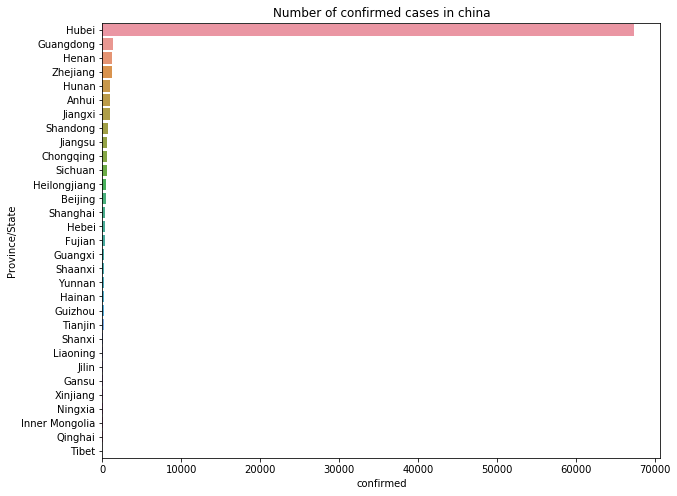

In [0]:
sns.barplot(x='confirmed',y='Province/State',data=temp_china_data_sort)
plt.title('Number of confirmed cases in china')

Text(0.5, 1.0, 'Number of deaths cases in china')

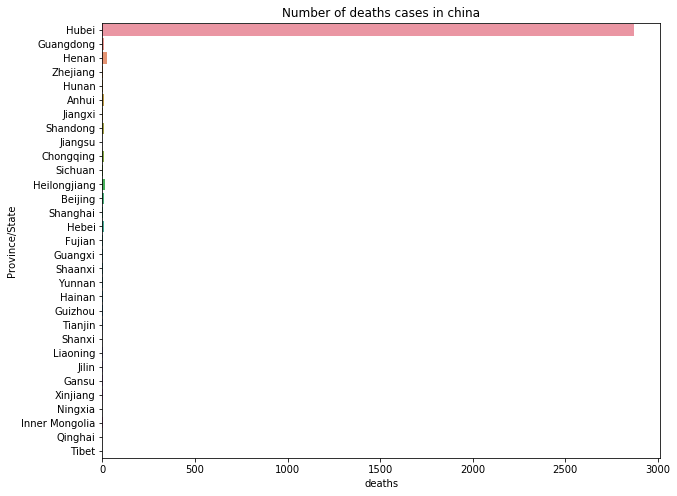

In [0]:
sns.barplot(x='deaths',y='Province/State',data=temp_china_data_sort)
plt.title('Number of deaths cases in china')

Text(0.5, 1.0, 'Number of recovered cases in china')

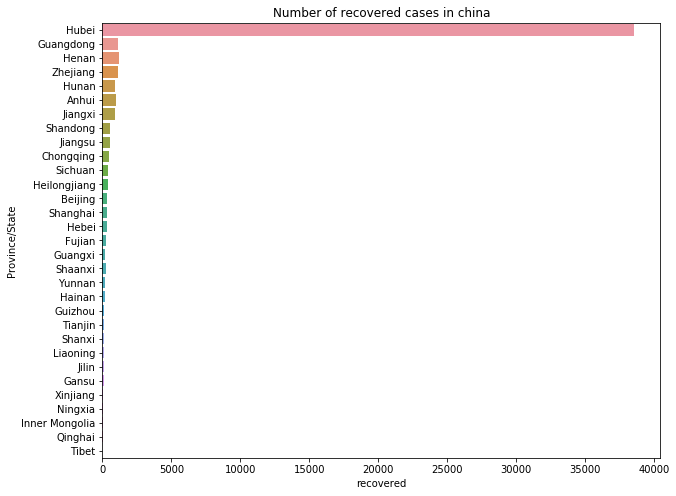

In [0]:
sns.barplot(x='recovered',y='Province/State',data=temp_china_data_sort)
plt.title('Number of recovered cases in china')

In [0]:
groupedvalues_china_data = china_data.groupby('Province/State').max().reset_index()

In [0]:
groupedvalues_china_data.drop(['Lat','Long','Country/Region','Date'],axis=1,inplace=True)

In [0]:
df_groupedvalues_china_data = groupedvalues_china_data.melt(id_vars=["Province/State"], 
        var_name="Type", 
        value_name='NumberOfPeople')

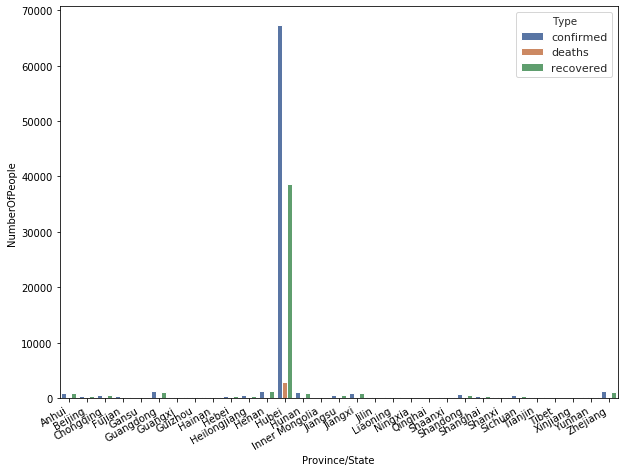

In [0]:
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.barplot(x='Province/State',y='NumberOfPeople',data=df_groupedvalues_china_data,hue = 'Type')
fig.autofmt_xdate()



In [0]:
# EDA on world data not including china
word_data = data[data['Country/Region'] != 'Mainland China']

In [0]:
temp = word_data.groupby(['Province/State'])['confirmed', 'deaths', 'recovered'].max()
tempsort = temp.sort_values('confirmed',ascending=False)[:40]
tempsort = tempsort.reset_index()
tempsort.style.background_gradient(cmap='Pastel1_r')

,Province/State,confirmed,deaths,recovered
0,South Korea,5621,35,41
1,Italy,3089,107,276
2,Iran,2922,92,552
3,Diamond Princess cruise ship,706,6,10
4,Japan,331,6,43
5,France,285,4,12
6,Germany,262,0,16
7,Spain,222,2,2
8,Singapore,110,0,78
9,Hong Kong,105,2,37


Text(0.5, 1.0, 'Number of confirmed cases in World excluding china')

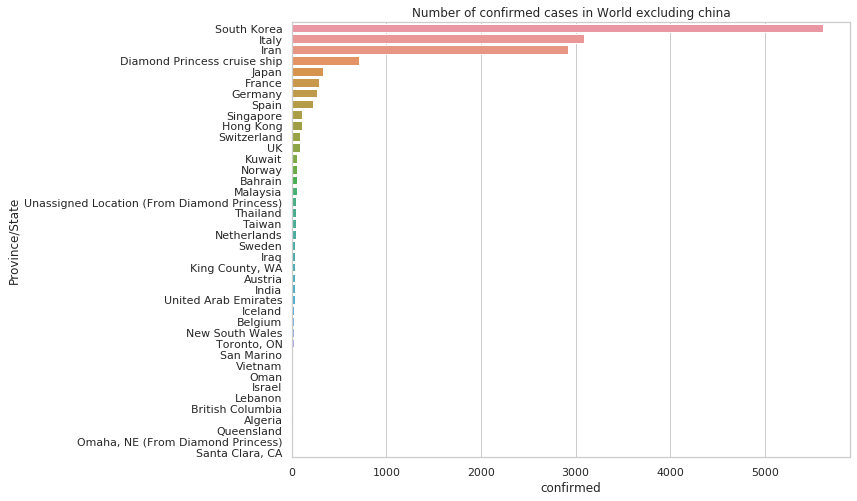

In [0]:
sns.barplot(x='confirmed',y='Province/State',data=tempsort)
plt.title('Number of confirmed cases in World excluding china')

Text(0.5, 1.0, 'Number of deaths cases in World excluding china')

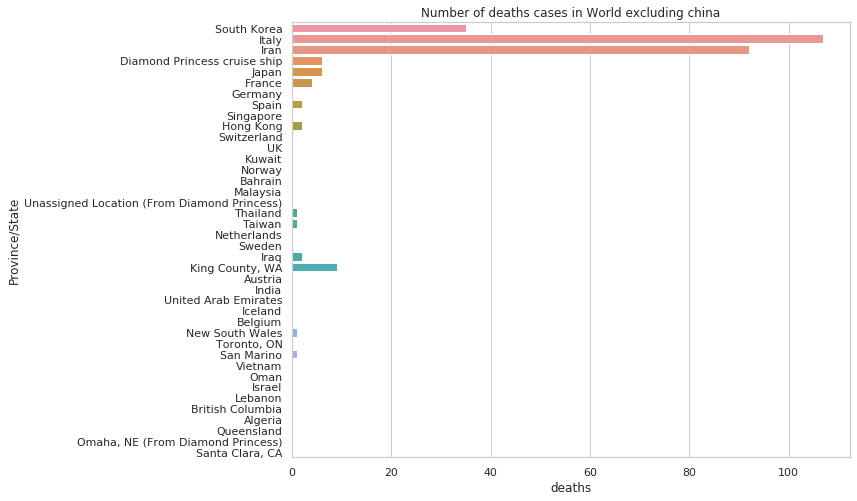

In [0]:
sns.barplot(x='deaths',y='Province/State',data=tempsort)
plt.title('Number of deaths cases in World excluding china')

Text(0.5, 1.0, 'Number of recovered cases in World excluding china')

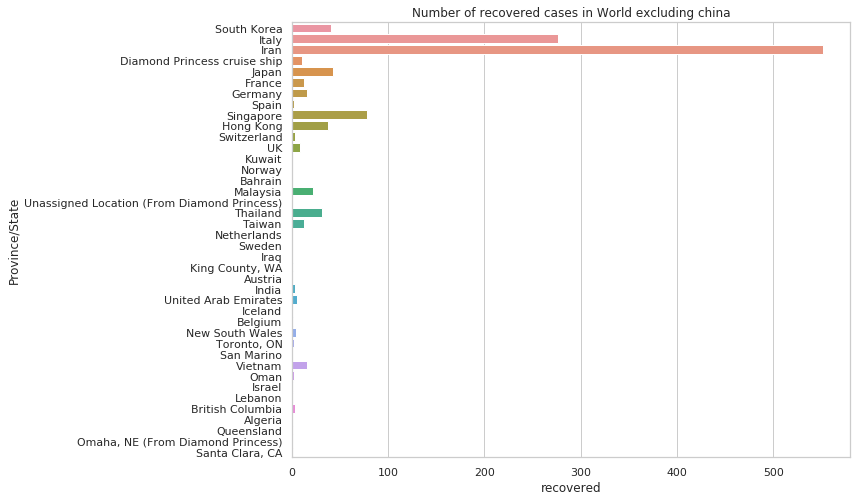

In [0]:
sns.barplot(x='recovered',y='Province/State',data=tempsort)
plt.title('Number of recovered cases in World excluding china')

In [0]:
df_groupedvalues_word_data = tempsort.melt(id_vars=["Province/State"], 
        var_name="Type", 
        value_name='NumberOfPeople')

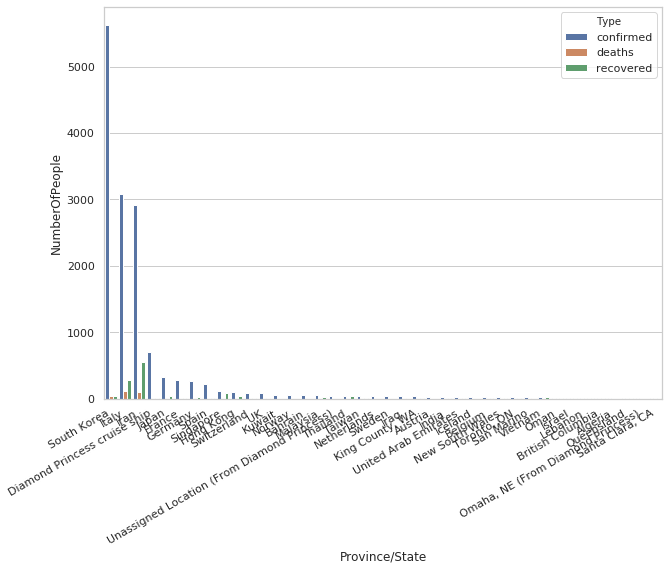

In [0]:
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.barplot(x='Province/State',y='NumberOfPeople',data=df_groupedvalues_word_data,hue = 'Type')
fig.autofmt_xdate()

In [0]:
!pip install squarify

In [0]:
import matplotlib.pyplot as plt
import squarify

In [0]:
def setLabel(state,conf,recov,deaths):
  survival_rate = recov/conf *100
  death_rate = deaths/conf *100
  if conf >300:
    return '{0}\nConfirmed:{3}\nSurvival Rate:{1:.2f}%\nDeath Rate:{2:.2f}%'.format(state,survival_rate,death_rate,conf)
  else:
    return '{0}\nC:{3}\nS_R:{1:.2f}%\nD_R:{2:.2f}%'.format(state,survival_rate,death_rate,conf)



In [0]:
  tempsort['label'] = tempsort.apply(lambda x :setLabel(x['Province/State'],x['confirmed'],x['recovered'],x['deaths']),axis=1)

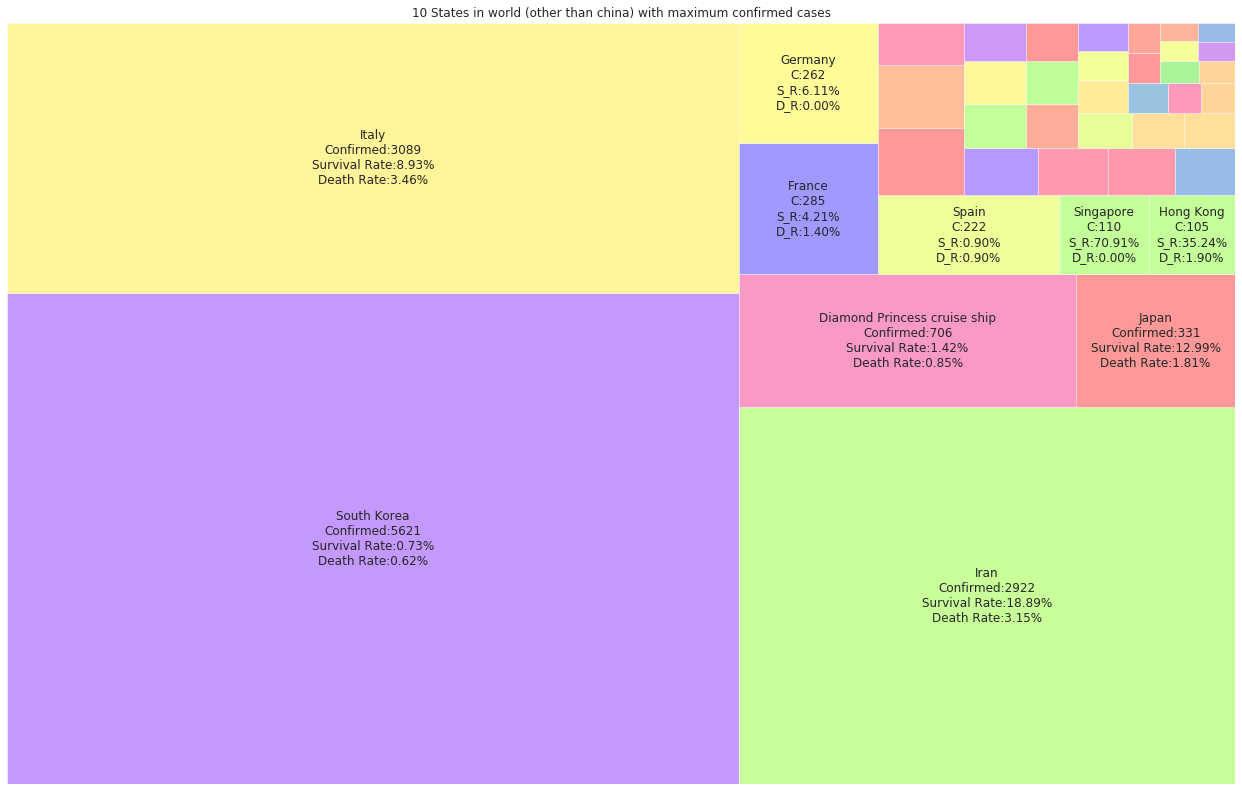

In [0]:
plt.figure(figsize=(22,14))
size = tempsort.shape[0]
color = plt.cm.prism(np.random.rand(size))
squarify.plot(sizes = tempsort['confirmed'], label=tempsort['label'][:10],  color = color,alpha=.4 )
plt.title("10 States in world (other than china) with maximum confirmed cases")
plt.axis('off')
plt.show()

In [0]:
temp_china_data_sort['label'] = temp_china_data_sort.apply(lambda x :setLabel(x['Province/State'],x['confirmed'],
                                                                              x['recovered'],x['deaths']),axis=1)


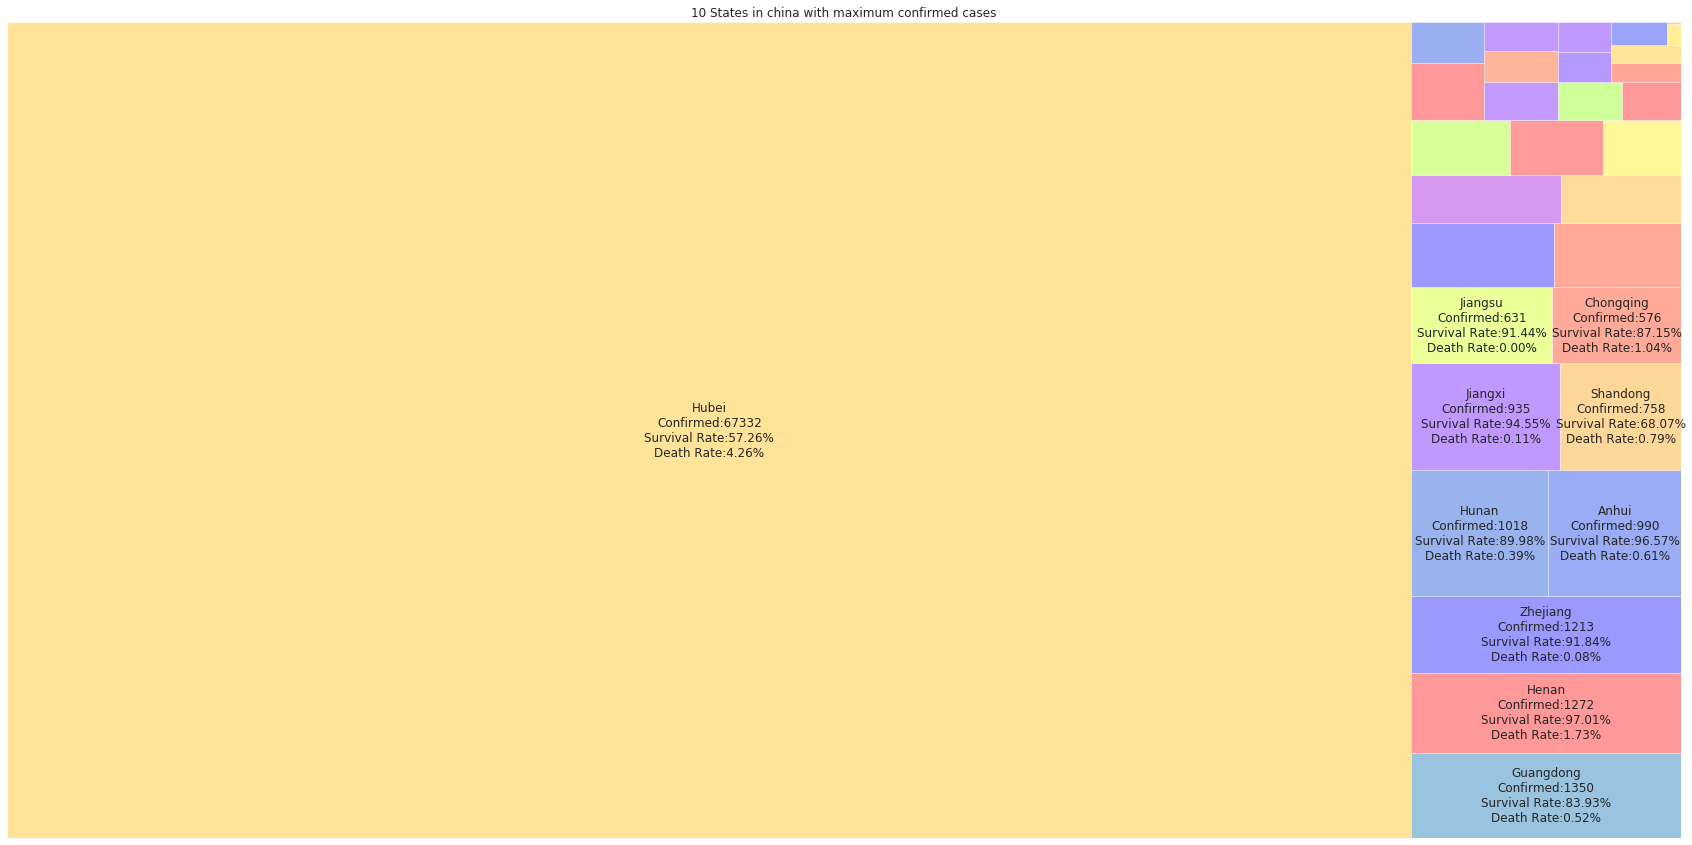

In [0]:
plt.figure(figsize=(30,15))
size = temp_china_data_sort.shape[0]
color = plt.cm.prism(np.random.rand(size))
squarify.plot(sizes = temp_china_data_sort['confirmed'], label=temp_china_data_sort['label'][:10],  color = color,alpha=.4 )
plt.axis('off')
plt.title("10 States in china with maximum confirmed cases")
plt.show()